In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../CSVs/hindu_articles.csv')
df.head(5)

,name,date,location,category,author,body
0,Juvenile users of Chinese gay app contract HIV,"January 06, 2019",Health,"Sci-Tech,Health",NaN,Chinese gay dating app Blued is halting new us...
1,21dcangr-ctte-cGNE54S5ME3jpgjpg,"December 28, 2018",DOWN TOWN,"Today's Paper,FEATURES,DOWN TOWN",NaN,Students stage a dance based on the theme of HIV.
2,A year that saw Tamil Nadu's health sector sta...,"December 30, 2018",Tamil Nadu,"News,States,Tamil Nadu",Serena Josephine M,The year was one of ups and downs for the heal...
3,‘Many combination drugs not approved by regula...,"December 11, 2018",NATIONAL,"Today's Paper,NATIONAL",Afshan Yasmeen,Of the 110 anti-TB (tuberculosis) Fixed Dose C...
4,HIV reality check,"December 31, 2018",OPINION,"Today's Paper,OPINION",NaN,A 23-year-old pregnant woman in Tamil Nadu tes...


In [4]:
from datetime import datetime, timedelta
from collections import Counter
years = [x[-4:] for x in df['date']]
day = [x[-8:-6] for x in df['date']]
month = [x[:-9] for x in df['date']]
years = pd.Series(years)
month = pd.Series(month)
day = pd.Series(day)
count = Counter(month)
count

Counter({'January': 1579,
         'December': 3361,
         'November': 2020,
         'October': 1504,
         'August': 1617,
         'July': 1823,
         'June': 1538,
         'May': 1496,
         'April': 1361,
         'September': 1663,
         'March': 1939,
         'February': 1574,
         '': 1})

In [5]:
keys = list(count.keys())[:-1]
values = list(count.values())[:-1]
final = pd.DataFrame(keys, columns=['month'])
months_sorted = sorted(keys, key=lambda day: datetime.strptime(day, "%B"))
months_sorted = pd.DataFrame(months_sorted, columns=['month'])
final['articles'] = values
final = months_sorted.set_index('month').join(final.set_index('month'))

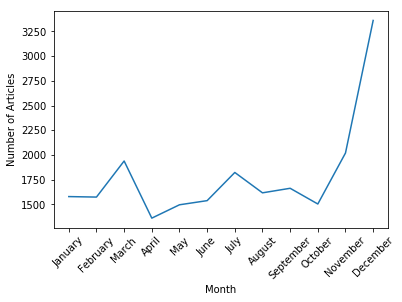

In [6]:
fig = plt.figure()
ax1 = plt.subplot()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
ax1.plot(final)
plt.savefig('month.png')

In [7]:
count_years = Counter(years)
del count_years['date']
count_years

Counter({'2019': 78,
         '2018': 1312,
         '2017': 1223,
         '2016': 1868,
         '2015': 1801,
         '2014': 1813,
         '2013': 2607,
         '2012': 2350,
         '2011': 1444,
         '2010': 1438,
         '2009': 1098,
         '2008': 1266,
         '2007': 1657,
         '2006': 1520})

In [8]:
keys = list(count_years.keys())
values = list(count_years.values())
final = pd.DataFrame(keys, columns=['month'])
months_sorted = sorted(keys, key=lambda day: datetime.strptime(day, "%Y"))
months_sorted = pd.DataFrame(months_sorted, columns=['month'])
final['articles'] = values
final = months_sorted.set_index('month').join(final.set_index('month'))

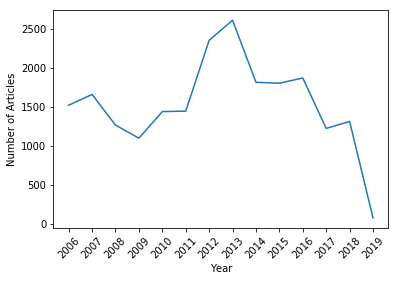

In [9]:
fig = plt.figure()
ax1 = plt.subplot()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
ax1.plot(final)
plt.savefig('years.png')

In [10]:
df2 = pd.read_csv('../CSVs/hindu_articles.csv')
date = df['date']
years = [x[-4:] for x in df['date']]
month = [x[:-9] for x in df['date']]
years = pd.Series(years)
month = pd.Series(month)
type(years[0])

str

In [11]:
dictt = {}
for j in set(years):
    l = []
    for i in zip(years, month):
        if i[0] == j:
            l.append(i[1])
    dictt[j] = l
    del l

In [12]:
division = {}
for i in list(months_sorted['month']):
    division[i] = dict(Counter(dictt[i]))
totals = {}
for i in list(months_sorted['month']):
    totals[i] = len(dictt[i])

In [13]:
month_sort = list(division['2006'].keys())
months_sort = sorted(month_sort, key=lambda day: datetime.strptime(day, "%B"))
month_sort

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [17]:
month_wise = {}
for j in division['2006'].keys():
    li = []
    for i in division.keys():
        li.append(division[i][j])
    month_wise[j]= li 
    del li     

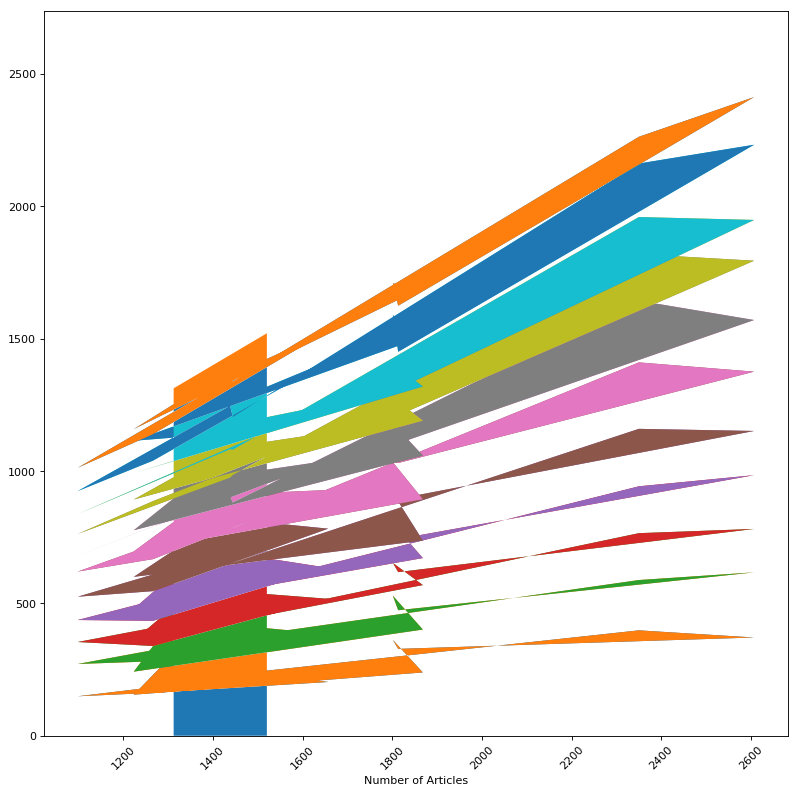

In [22]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('Number of Articles')
plt.ylabel('')
ax1.stackplot(list(totals.values()), month_wise[month_sort[0]], month_wise[month_sort[1]], month_wise[month_sort[2]], month_wise[month_sort[3]], month_wise[month_sort[4]], month_wise[month_sort[5]], month_wise[month_sort[6]], month_wise[month_sort[7]], month_wise[month_sort[8]], month_wise[month_sort[9]], month_wise[month_sort[10]], month_wise[month_sort[11]])
plt.savefig('stack.png')